无监督学习是指在给定的数据集中，不存在实现给定的目标值，也就是不指定某个样本是哪一类，无监督学习要做的就是把特征值类似的样本数据划分为一类，划分的依据则是根据数据的特征（具体如何处理他们的特征，则是看具体的算法是怎么处理的，一般是根据样本之间的距离来进行类的划分）。

无监督学习中，要划分的类别或者目标变量事先并不存在。摆在面前的是一堆无意义的数据集，要对其进行分组,将相似的对象归到同一个类（簇）中。聚类源于分类，但不等于分类，两者最大的区别在于聚类要划分的类是未知的，也就是没有数据标记，没有标记则不知道最佳结果（训练目标），无需训练数据，这是无监督学习的共性。

分类是确定数据类别的，训练数据是有标记的，这是监督学习啊。分类的结果是生成一个函数（或者模型），用于数据分类，而且待分类数据的类别必然是已知的几种类别。

先通过一个例子看一下聚类的前后对比图，图示将原始数据集聚成了三类：![jupyter](./no-moni-1.jpg)
其中最重要的算法有三个：**K均值算法、基于Apriori的关联分析、基于FP-growth的关联分析**。

# K均值算法

## K均值聚类 kmeans
k-means聚类将相似的对象归到同一个簇中，每个簇的中心采用簇中所含值的均值计算而成。**优点**是容易实现，**缺点**是可能收敛到局部最小值，在大规模数据上收敛较慢，适用数据类型是数值型数据。

**kmeans聚类流程：**

1、随机选取k（k值代表类的个数）个样本数据点作为初始的**聚类中心**，也叫质心。

2、分别计算其他每个点到k个中心点的距离（通常使用**欧几里得距离**），选择距离最近的中心点并做上类标记。$dist$是欧氏空间中两个对象$x_i,x_j$之间的标准欧氏距离$$dist(x_i,x_j)=\sqrt {\sum_{l=1}^n|x_i^l-x_j^l|^2}$$其中，$x_i^l$表示$x_i$的第l个特征，一共n个特征。

3、接着对标记后的每个类中的数据样本，**重新计算出每个聚类下的新中心**（往往**取样本每个特征维度的平均值**作为新的聚类中心点）。

4、重复执行第二步，如果计算得出的新中心点与原中心点一样，也就是每个类中的数据与前一次的聚类结果一样，那么**结束执行**即可，此时聚类已经完成。

实现代码如下：

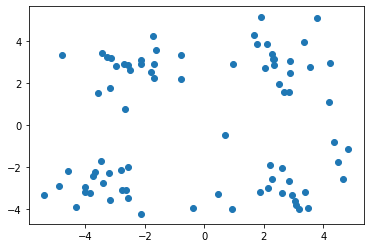

[[-1.78430243  3.04807065]
 [-0.51160841  1.10430533]
 [-5.10413333  1.82494924]
 [-3.51464767 -2.45785799]] 


[[-1.88059411  3.18678789]
 [ 2.63613979  0.22011221]
 [-4.177196    2.445079  ]
 [-3.01169468 -3.01238673]] 


[[-1.10672324  3.21669776]
 [ 2.96765829 -0.04151062]
 [-3.44540871  2.477729  ]
 [-3.01169468 -3.01238673]] 


[[-0.24713193  3.37721667]
 [ 3.01706084 -0.27140412]
 [-3.17006745  2.60393509]
 [-3.01169468 -3.01238673]] 


[[ 1.28154061  3.5524515 ]
 [ 3.10012512 -1.31169504]
 [-2.84017553  2.6309902 ]
 [-3.01169468 -3.01238673]] 


[[ 2.3772111   3.2195035 ]
 [ 2.8692781  -2.54779119]
 [-2.54951105  2.75812458]
 [-3.38237045 -2.9473363 ]] 


[[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]] 


[[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]] [[0.00000000e+00 2.32019150e+00]
 [2.00000000e+00 1.39004893e+00]
 [1.00000000e+00 6.63839104e+00]
 [3.0000

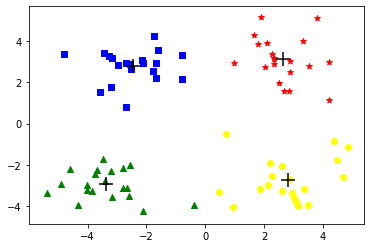

In [1]:
# encoding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curline = line.strip().split('\t')
        fltLine = map(float, curline)
        dataMat.append(list(fltLine))
    return dataMat

def distEclud(vecA, vecB):
    #函数说明：计算两个向量的欧式距离
    return np.sqrt(np.sum(np.power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    """
    函数说明：随机选取k个聚类质心
    :param dataSet: 数据集
    :param k: 质心个数
    :return: 质心
    """
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n))) #创建质心向量
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = np.min(dataSet[:,j])
        rangeJ = float(np.max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))    #np.random.rand(k,1)随机生成k*1的[0,1)的数
    return centroids

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """
    函数说明：k-均值聚类函数
    :param dataSet: 数据集
    :param k: 分为k类
    :param distMeas: 计算数据到质心距离
    :param createCent: 创建质心函数
    :return:
        centroids： 质心位置
        clusterAssment： 第一列是所属分类下标，第二列是点到质心距离
    """
    """
    伪代码：
        创建k个点作为起始质心（随机选择）
        当任意一个点的簇分类结果发生改变时：
            对数据集中的每个数据点：
                对每个质心：
                    计算点到质心的距离
                将数据点分配到距其最近的簇
            根据每个簇的均值重新计算每个质心
    """
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))    #第一列存放簇类index,第二列存放误差值
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  #遍历每一行数据，将数据划分到最近的质心
            minDist = np.inf; minIndex = -1
            for j in range(k):  #计算第i个数据到每个质心的距离
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
        print(centroids,"\n\n")
        for cent in range(k):   #重新计算质心
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#获取某个簇类的所有点
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #计算均值作为新的簇类中心
    return centroids, clusterAssment


def plot(dataSet):
    """
    函数说明：绘制原数据集
    :param dataSet:
    :return:
    """
    x = dataSet[:, 0].tolist()
    y = dataSet[:, 1].tolist()
    plt.scatter(x, y)
    plt.show()


def plotKMeans(dataSet, clusterAssment, cenroids):
    """
    函数说明：绘制聚类后情况
    :param dataSet: 数据集
    :param clusterAssment: 聚类结果
    :param cenroids: 质心坐标
    :return:
    """
    m = np.shape(dataSet)[0]
    x0 = dataSet[np.nonzero(clusterAssment[:, 0] == 0), 0][0].tolist()
    y0 = dataSet[np.nonzero(clusterAssment[:, 0] == 0), 1][0].tolist()
    x1 = dataSet[np.nonzero(clusterAssment[:, 0] == 1), 0][0].tolist()
    y1 = dataSet[np.nonzero(clusterAssment[:, 0] == 1), 1][0].tolist()
    x2 = dataSet[np.nonzero(clusterAssment[:, 0] == 2), 0][0].tolist()
    y2 = dataSet[np.nonzero(clusterAssment[:, 0] == 2), 1][0].tolist()
    x3 = dataSet[np.nonzero(clusterAssment[:, 0] == 3), 0][0].tolist()
    y3 = dataSet[np.nonzero(clusterAssment[:, 0] == 3), 1][0].tolist()
    plt.scatter(x0, y0, color = 'red', marker='*')
    plt.scatter(x1, y1, color = 'yellow', marker='o')
    plt.scatter(x2, y2, color = 'blue', marker='s')
    plt.scatter(x3, y3, color = 'green', marker='^')
    for i in range(np.shape(cenroids)[0]):
        plt.scatter(cenroids[i, 0], cenroids[i, 1], color='k', marker='+', s=200)
    # plt.plot(cenroids[0,0], cenroids[0,1], 'k+', cenroids[1,0], cenroids[1,1], 'k+',cenroids[2,0],
    #          cenroids[2,1], 'k+',cenroids[3,0], cenroids[3,1], 'k+',)
    plt.show()
    
if __name__ == '__main__':
    dataSet = loadDataSet('no-moni-testSet.txt')
    dataMat = np.mat(dataSet)
    plot(dataMat)
    cenroids, clusterAssment = kMeans(dataMat, 4)
    print(cenroids, clusterAssment)
    plotKMeans(dataMat, clusterAssment, cenroids)

k个初始质心是随机选择的，不同质心的选择可能产生不同的k个簇。

如何才能知道生成的簇哪个比较好呢？我们使用**误差的平方和（Sum of the Squared Error,SSE）**作为度量聚类质量的目标函数。我们计算每个数据点的误差，即它到最近质心的欧氏距离，然后计算误差的平方和。SSE形式地定义如下：$$SSE=\sum_{i=1}^k\sum_{x\in C_i}dist(c_i,x)^2$$其中，$x$是簇$C_i$的质心。

SSE值越小表示数据点越接近于它们的质心，聚类效果也越好。一种肯定可以降低SSE值的方法是**增加簇的个数**，但这违背了聚类的目标，聚类的目标是在簇数目不变的情况下提高簇的质量。

KMeans擅长处理球状分布的数据，当结果聚类是密集的，而且类之间的区别比较明显时，K均值的效果比较好。对于处理大数据集，该算法时相对可伸缩的和高效的，其复杂度时$O(nkt)$，n是对象的个数，k是簇数目，t迭代数目。相比其它聚类算法，KMeans比较简单，容易掌握，这也是其得到广泛应用的原因。

但是KMeans算法也存在一些**不足**：

（1）算法的初始质心与算法的运行效率密切相关。

（2）K均值的最大问题是yaoqiu 用户事先给出k的个数。对不同数据集，k的取值没有可借鉴性。

（3）对异常偏离的数据敏感。即可能有些点是离群点，或者孤立点，这类数据对均值有极大的影响。


## 二分k-means聚类
**二分k-means聚类算法的**思想**是先将所有数据点当作一个簇，然后将该簇一分为二。之后在现有的簇中选择一个簇将其一分为二，选择哪一个簇进行划分取决于对其划分是否可以最大程度降低SSE值。上述基于SSE的划分过程不断重复，直到得到用户指定的簇数目为止。

以上思路隐藏的一个原则是：因为聚类的误差平方和能够衡量聚类性能，该值越小，表示数据点越接近质心，聚类效果就越好。因此要对误差平方和最大的簇再进行划分。

代码如下：

[[ 2.84596203 -1.81720941]
 [ 1.98515976  0.40663569]] 


[[-0.26162575 -3.11178156]
 [-0.11993984  2.80246164]] 


[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]] 


sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-0.51120729 -3.31872779]
 [-1.33392641 -1.67645064]] 


[[-0.15366667 -3.15354   ]
 [-1.3776246  -1.6522424 ]] 


[[-0.05200457 -3.16610557]
 [-1.41084317 -1.873139  ]] 


[[-7.11923077e-04 -3.21792031e+00]
 [-1.31198114e+00 -1.96162114e+00]] 


[[ 0.07973025 -3.24942808]
 [-1.26873575 -2.07139688]] 


[[ 0.19848727 -3.24320436]
 [-1.26405367 -2.209896  ]] 


[[ 0.2642961 -3.3057243]
 [-1.1836084 -2.2507069]] 


[[ 0.35496167 -3.36033556]
 [-1.12616164 -2.30193564]] 


sseSplit, and notSplit:  12.753263136887313 423.8762401366249
[[-0.77555366  4.19640885]
 [-3.79806907  1.73122928]] 


[[ 1.86138027  3.22269712]
 [-3.47615207  3.23528529]] 


[[ 2.76275171  3.12704005]
 [-3.06779095  3.33769884]] 


[[ 2.933

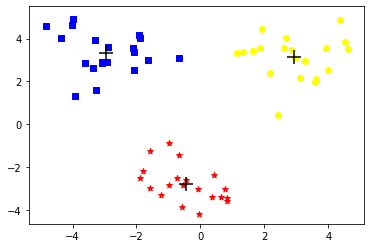

the error of biKmeans: [[106.74949876]]


In [5]:
def biKmeans(dataSet, k, distMeas=distEclud):
    """
    函数说明：二分K-均值算法
    :param dataSet:
    :param k:
    :param distMeas:
    :return:
    """
    """
    伪代码：
        将所有数据点都看成一个簇
        当簇的数目小于k时：
            初始化lowestSSE = inf
            对于每一个簇：
                对该簇进行k-means聚类(k=2)
                计算聚类后的总误差
                如果小于lowestSSE,则保存聚类后的参数，更新lowestSEE
            选择划分后使得误差值最小的那个簇进行划分
    """
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    #创建一个初始簇
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList = [centroid0] #用来保存质心的列表
    for j in range(m):  #初始化簇中每个点的误差值
        clusterAssment[j, 1] = distMeas(np.mat(centroid0), dataSet[j,:])**2
    while(len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:] #获取属于第i个簇类的所有数据点
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)  #对属于第i个簇类的所有数据点进行k=2的聚类
            sseSplit = np.sum(splitClustAss[:,1])   #计算对第i个簇类进行聚类后的sse值
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1]) #计算不属于第i类的所有数据点的sse值
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:    #将聚类后的sse值与最低sse值进行比较
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #将1改变为新增簇的编号
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit   #将0改变为划分簇的编号
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        #使用新生成的两个质心坐标代替原来的质心坐标
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss #用新的聚类结果替换原来的
    return np.mat(centList), clusterAssment


if __name__ == '__main__':
    dataSet2 = loadDataSet('no-moni-testSet2.txt')
    dataMat2 = np.mat(dataSet2)

    cenroids2, clusterAssment2 = biKmeans(dataMat2, 3)
    plotKMeans(dataMat2, clusterAssment2, cenroids2)
    print('the error of biKmeans:', sum(clusterAssment2[:, 1]))

该算法不太受初始化问题的影响，因为它执行了多次二分试验并选取具有最小SSE的试验结果，还因为每步只有两个质心。

**优点与缺点**

k均值简单并且可以用于各种数据类型。它相当有效，尽管常常多次运行。k均值的某些变种（包括二分K均值）甚至更有效，并且不太受初始化问题的影响。然而，k均值并不适合所有的数据类型。它不能处理非球形簇、不同尺寸和不同密度的簇。最后，k均值仅限于具有中心（质心）概念的数据。

## 讨论
**轮廓系数：**
轮廓系数（Silhouette Coefficient）结合了聚类的**凝聚度（Cohesion）和分离度（Separation）**，用于**评估聚类的效果**。该值处于-1~1之间，值越大，表示聚类效果越好。具体计算方法如下：

1、对于每个样本点i，计算点i与其同一个簇内的所有其他元素距离的平均值，记作a(i)，用于量化**簇内的凝聚度**。

2、选取i外的一个簇b，计算i与b中所有点的平均距离，遍历所有其他簇，找到最近的这个平均距离,记作b(i)，即为i的邻居类，用于量化**簇之间分离度**。

3、对于样本点i，**轮廓系数**$s(i) =\frac { b(i) – a(i)}{max(a(i),b(i))}$

4、计算所有i的轮廓系数，求出平均值即为当前聚类的**整体轮廓系数**，度量数据聚类的紧密程度

从上面的公式，不难发现若s(i)小于0，说明i与其簇内元素的平均距离小于最近的其他簇，表示聚类效果不好。如果a(i)趋于0，或者b(i)足够大，即a(i)<<b(i)，那么s(i)趋近与1，说明聚类效果比较好。
 
**K值确定**
法1：(轮廓系数)在实际应用中，由于Kmean一般作为数据预处理，或者用于辅助分聚类贴标签。所以k一般不会设置很大。可以通过枚举，令k从2到一个固定值如10，在每个k值上重复运行数次kmeans(避免局部最优解)，并计算当前k的平均轮廓系数，最后选取轮廓系数最大的值对应的k作为最终的集群数目。

法2：(Calinski-Harabasz准则)
  ![jupyter](./no-moni-2.jpg)
 
**初始点选择方法**：
基本思想，初始的聚类中心之间相互距离尽可能远。

法1(kmeans++):

1、从输入的数据点集合中随机选择一个点作为第一个聚类中心

2、对于数据集中的每一个点x，计算它与最近聚类中心(指已选择的聚类中心)的距离D(x)

3、选择一个新的数据点作为新的聚类中心，选择的原则是：D(x)较大的点，被选取作为聚类中心的概率较大

4、重复2和3直到k个聚类中心被选出来

5、利用这k个初始的聚类中心来运行标准的k-means算法

 从上面的算法描述上可以看到，算法的**关键是第3步**，如何将D(x)反映到点被选择的概率上，一种算法如下：
 
1、先从我们的数据库随机挑个随机点当“种子点”

2、对于每个点，我们都计算其和最近的一个“种子点”的距离D(x)并保存在一个数组里，然后把这些距离加起来得到Sum(D(x))。

3、然后，再取一个随机值，用权重的方式来取计算下一个“种子点”。这个算法的实现是，先取一个能落在Sum(D(x))中的随机值Random，然后用Random -= D(x)，直到其<=0，此时的点就是下一个“种子点”。

4、重复2和3直到k个聚类中心被选出来

5、利用这k个初始的聚类中心来运行标准的k-means算法
 
法2：选用层次聚类或Canopy算法进行初始聚类，然后从k个类别中分别随机选取k个点
，来作为kmeans的初始聚类中心点
 
优点：
1、 算法快速、简单;
2、 容易解释
3、 聚类效果中上
4、 适用于高维
 
缺陷：
1、 对离群点敏感，对噪声点和孤立点很敏感(通过k-centers算法可以解决)
2、 K-means算法中聚类个数k的初始化
3、初始聚类中心的选择，不同的初始点选择可能导致完全不同的聚类结果。

## 实例——对地图上的点进行聚类
问题是：你的朋友Drew希望你带他去城里庆祝生日，他想要一个晚上去70个地方，给了你这些地方的坐标，你需要将这些地方进行聚类，之后坐车抵达簇的中心，然后步行到簇的其他地方。
实现代码如下：

[[-122.42723274   45.64444994]
 [-122.42725155   45.6325249 ]] 


[[-122.842918     45.646831  ]
 [-122.62856971   45.5103284 ]] 


[[-122.76690133   45.612314  ]
 [-122.62552961   45.50776091]] 


[[-122.729442     45.58514429]
 [-122.62063813   45.5040831 ]] 


[[-122.74941346   45.545862  ]
 [-122.60434434   45.50451707]] 


[[-122.74823556   45.52585431]
 [-122.59648847   45.50821685]] 


[[-122.72797062   45.51642875]
 [-122.58031918   45.51010827]] 


[[-122.7142141    45.51492203]
 [-122.56818551   45.5102949 ]] 


[[-122.70981637   45.51478609]
 [-122.56409551   45.51016235]] 


sseSplit, and notSplit:  3073.8303715312386 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
[[-122.80259313   45.61514373]
 [-122.6480064    45.44712349]] 


[[-122.72836525   45.57987825]
 [-122.70363342   45.49308871]] 


[[-122.72072414   45.59011757]
 [-122.7067622    45.49369328]] 


sseSplit, and notSplit:  1049.9019282008167 1388.799845546737
[[-122.63254107   45.45620337]
 [-122.4

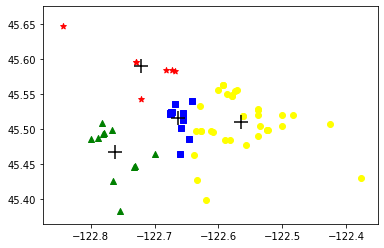

[[1896.20587311]]


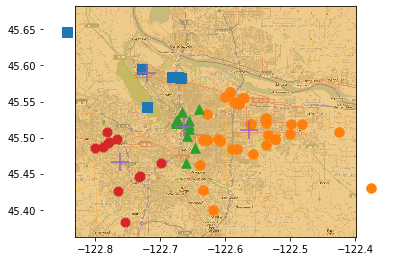

In [6]:
#!/usr/bin/env python
# encoding: utf-8
'''
@author: shuhan Wei 
@software: pycharm
@file: placeFinder.py
@time: 18-9-18 下午9:04
@desc:
'''
import numpy as np
from math import radians, cos, sin, asin, sqrt
#import kMeans
import matplotlib.pyplot as plt

def distSLC(vecA, vecB):
    """
    函数说明：计算根据经纬度计算两点之间的距离
    :param vecA: 一个点坐标向量
    :param vecB: 另一个点坐标向量
    :return: 距离
    """
    #这个例子中要聚类的俱乐部给出的信息为经度和维度，但这些信息对于距离计算还不够。
    #在北极附近每走几米的经度变化可能达到数10度 ；而在赤道附近走相同的距离，带来的经度变化可能只是零点几。
    #可以使用球面余弦定理来计算两个经纬度之间的距离
    a = sin(vecA[0,1] * np.pi/180) * sin(vecB[0,1] * np.pi/180)
    b = cos(vecA[0,1]* np.pi/180) * cos(vecB[0,1]* np.pi/180) * \
                      cos(np.pi * (vecB[0,0]-vecA[0,0]) /180)
    return np.arccos(a + b)*6371.0


def clusterClubs(numClust = 5):
    """
    函数说明：对地图坐标进行聚类，并在地图图片上显示聚类结果
    :param numClust: 聚类数目
    :return:
    """
    clubsCoordinate = []
    fr = open('no-moni-places.txt')
    for line in fr.readlines():
        lineCur = line.strip().split('\t')
        # lineMat = np.mat(lineCur)[0, -2:]   #获取最后两列经纬度
        # fltLinr = map(float, lineMat.tolist()[0])
        # clubsCoordinate.append(list(fltLinr))
        clubsCoordinate.append([float(lineCur[-1]), float(lineCur[-2])])    #获取最后两列经纬度
    clubsCoordinateMat = np.mat(clubsCoordinate)
    cenroids, clusterAssment = biKmeans(clubsCoordinateMat, numClust,distMeas=distSLC)
    plotKMeans(clubsCoordinateMat, clusterAssment, cenroids)
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8] #使用矩阵来设置图片占绘制面板的位置，左下角0.1,0.1,右上角0.8,0.8
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<'] #形状列表
    axprops = dict(xticks=[], yticks=[])
    ax0 = fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')   #基于一幅图像来创建矩阵
    ax0.imshow(imgP)    #绘制该矩阵
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = clubsCoordinateMat[np.nonzero(clusterAssment[:, 0].A == i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle,
                    s=90) #flatten()将m*n的矩阵转化为1*(m×n)的矩阵,.A[0]矩阵转化为数组后获取数组第一维数据
    ax1.scatter(cenroids[:, 0].flatten().A[0], cenroids[:, 1].flatten().A[0], marker='+', s=300)
    print(sum(clusterAssment[:,1]))
    plt.show()


if __name__ == '__main__':
    clusterClubs(4)

## sklearn实现

Methods：
fit(X[,y]):
　计算k-means聚类。
fit_predictt(X[,y]):
　计算簇质心并给每个样本预测类别。
fit_transform(X[,y])：
计算簇并 transform X to cluster-distance space。
get_params([deep])：
　取得估计器的参数。
predict(X):predict(X)
　给每个样本估计最接近的簇。
score(X[,y]):
　计算聚类误差
set_params(**params):
　为这个估计器手动设定参数。
transform(X[,y]): 将X转换为群集距离空间。
　在新空间中，每个维度都是到集群中心的距离。 请注意，即使X是稀疏的，转换返回的数组通常也是密集的。
  

Text(0.5, 1.0, 'Correct Number of Blobs')

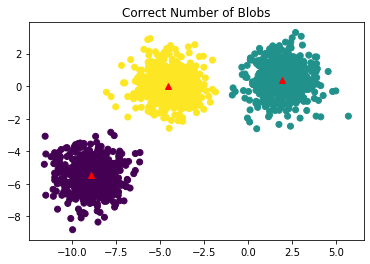

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
plt.figure()
 
n_samples = 1500
random_state = 170 #用于初始化质心的生成器
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
 
# correct number of clusters
estimator= KMeans(n_clusters=3, random_state=random_state)
y_pred =estimator.fit_predict(X)#计算簇质心并给每个样本预测类别。
xy=estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(xy[:,0],xy[:,1],'r^')
plt.title("Correct Number of Blobs")

# 基于Apriori的关联分析

通过查看哪些商品经常在一起购买，可以帮助商店了解用户的购买行为。这种从数据海洋中抽取的知识可以用于商品定价，市场促销，存货管理等环节。从大规模数据集中寻找物品的隐含关系称为 关联分析 或则 关联规则学习。我们将使用Apriori算法来解决上述问题。
## 关联分析
关联分析是一种在大规模数据集中寻找有趣关系的任务。 这些关系可以有两种形式：**频繁项集或则关联规则**。 **频繁项集**是经常出现在一块的物品的集合，**关联规则**暗示两种物品之间可能存在很强的关系。
如下图![ljupyter](./no-moni-3.png)

**频繁项集**是指那些经常出现在一起的物品集合，比如｛葡萄酒，尿布，豆奶｝就是频繁项集的一个例子。从数据集中也可以看出尿布--->葡萄酒的关联规则。这就意味着如果有人买了尿布，那么他也可能会买葡萄酒。    

**一个项集的支持度**被定义为数据集中包含该项集的记录所占的比例。 上图中｛豆奶｝的支持度为4/5。五条交易记录中有三条包含｛豆奶，尿布｝，因此｛豆奶，尿布｝的支持度是3/5。支持度是针对项集来说的，因此可以定义一个**最小支持度**，而只保留满足最小支持度的项集。    

**可信度或置信度**是针对一条诸如｛尿布｝-->｛葡萄酒｝的关联规则来定义的。这条规则的置信度被定义为“支持度｛尿布，葡萄酒｝/支持度｛尿布｝”。从图11-1中可以计算出｛尿布，葡萄酒｝的支持度为3/5，尿布的支持度为4/5，所以“｛尿布｝-->｛葡萄酒｝” 的可信度为3/4=0.75。这意味着对于包含“尿布”的所有记录中，我们的规则对其中75%的记录都适用。    

**支持度和可信度**是用来量化关联分析是否成功的方法。假设想寻找支持度大于0.8的所有项集，一个办法是生成一个物品所有可能组合的清单，然后对每一种组合统计它出现的频繁程度，但是当物品成千上万时，上述做法会非常慢。所以我们将会学习**aprior原理，该原理将会减少关联规则学习时所需的计算量**。

Apriori原理的理解：

(1.) 项集的支持度可以理解为数学中的概率。而超集就是多个事件的交。

比如：豆奶的支持度为：，而在数学的概率论中，我们可以记购买了豆奶为事件A，那么A发生的概率就是：P(A)=，我们再记购买了尿布为事件B，那么集合{豆奶、尿布}是{豆奶}的超集，它的支持度是：，而在概率论中，A与B同时发生的概率也是：P(A•B)=，因此我们这么理解支持度是对的。

(2.) 由概率公式我们知道：P(A•B) ≤ P(A) ，通俗点讲就是：P(A的超集) ≤ P(A)，因此既然支持度就是概率，只要P(A)都不满足最小支持度要求了，那么P(A的超集) 肯定更小，它更不会满足要求，这也是我们的Apriori原理的解释。

(3.) 可信度就是条件概率。

因此，当一个项集是非频繁的，我们不需要计算它的超集了，因为它的超集不会满足我们的要求，这样就避免了项集数目的指数增长，从而在合理的时间内计算出频繁项集。

## Apriori原理    
假设我们经营一家商品种类并不多的杂货店，我们对那些经常在一起被购买的商品非常感兴趣。我们只有4种商品：商品0，商品1，商品2和商品3。那么所有可能被一起购买的商品组合都有哪些？这些商品组合可能只有一种商品，比如商品0 , 也可能包括两种、三种或者所有四种商品。我们并不关心某人买了两件商品0以及四件商品2的情况，我们只关心他购买了一种或多种商品。![ljupyter](./no-moni-4.png)

上图显示了物品之间所有可能的组合。物品集合之间的连线表明两个或更多的集合可以组合成一个更大的集合。    

前面说过我们的目标是找到经常一起购买的物品集合，就要找到**集合的支持度**来度量其出现的频率。但是我们计算过程中要遍历数据很多次，在物品数目种类过大时会有更多的物品组合，对于现代计算机来说也需要很长时间才能运算完成。    

**apriori原理**可以帮我们减少可能感兴趣的项集。apriori原始是说，**如果某个项集是频繁的，那么它的所有子集也是频繁的。反过来说也就是，如果一个项集是非频繁项集，那么它所有的超集也是非频繁的**。

## 使用Apriori算法来发现频繁项   
关联分析的目标包括两项：发现频繁项集和发现关联规则。**首先需要找到频繁项集，然后才能获得关联规则。本节将只关注与发现频繁项集**。      

**apriori算法算是发现频繁项集的一种方法**。apriori算法的两个**输入参数**分别是最小支持度和数据集。    

**基本思想**该算法首先会生成所有单个物品的项集列表。接着扫描交易记录来查看哪些项集满足最小支持度要求，那些不满足最小支持度的集合会被去掉。然后 ，对剩下来的集合进行组合以生成包含两个元素的项集。接下来，再重新扫描交易记录，去掉不满足最小支持度的项集。该过程重复进行直到所有项集都被去掉。

### 生成候选项集
例如一个数据集中，共有4种物品，则可能组成的频繁项集，如下图所示（图源：机器学习实战）：
     ![ljupyter](./no-moni-4.png)

**如果某个项是频繁的，那么这个项的所有子集也是频繁的。

逆否命题：如果某个项是非频繁的，那么这个项的所有超集也是非频繁的。**例如，如果{23}{23}      \{23\}{23}是非频繁的，那么{023} {123} {0123}{023} {123} {0123}      \{023\}\ \{123\}\ \{0123\}{023} {123} {0123}都是非频繁的，可以降低计算量。

**Apriori算法寻找频繁项集的流程：**

1、生成只包含单个物品的集合C1

2、去掉不满足最小支持度的项，剩余的项组成集合L1，将满足的项加入频繁项集

3、从L1中进行组合，生成项长度为2的集合C2

4、去掉不满足最小支持度的项，剩余的项组成集合L2，将满足的项加入频繁项集

5、从L2中进行组合，生成项长度为3的集合C3

6、如此循环迭代，直到只有一个项集无法进行组合，或者没有满足最小支持度的项集为止

完整的创造频繁项集列表的程序

In [8]:
from numpy import * 
def loadDataSet():    
    return [[1,3,4], [2,3,5], [1,2,3,5], [2,5]] 
def createC1(dataSet):  
    # 创造候选项集C1，C1是大小为1的所有候选项集的集合    
    C1 = []    
    for transaction in dataSet:           
        for item in transaction:            
            if not [item] in C1:               
                C1.append([item])    
    # C1.sort()     # 从大到小排序    
    return list(map(frozenset,C1)) 

def scanD(D,Ck,minSupport):  # 此函数计算支持度,筛选满足要求的项集成为频繁项集Lk，D是数据集，Ck为候选项集C1或C2或C3 ...    
    ssCnt = {}    
    for tid in D:        
        for can in Ck:            
            if can.issubset(tid):                
                if not can in ssCnt:                    
                    ssCnt[can] = 1                
                else:                    
                    ssCnt[can] += 1    
    numItems = float(len(D))    
    retList = []    
    supportData = {}    
    for key in ssCnt:        
        support = ssCnt[key]/numItems    # 计算支持度        
        if support >= minSupport:   # 如果支持度大于设定的最小支持度           
            # retList.insert(0,key)            
            retList.append(key)        
        supportData[key] = support    
    return retList, supportData

In [9]:
dataSet=loadDataSet()
print (dataSet)

[[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]


In [10]:
def aprioriGen(Lk, k):   # 新版aproriGen    
    lenLk = len(Lk)    
    temp_dict = {}  # 临时字典，存储    
    for i in range(lenLk):        
        for j in range(i+1, lenLk):            
            L1 = Lk[i]|Lk[j]  # 两两合并，执行了 lenLk！次            
            if len(L1) == k:  # 如果合并后的子项元素有k个，满足要求                
                if not L1 in temp_dict:  # 把符合的新项存到字典的键中，使用字典可以去重复，比如{1,2,3}和{3，1，2}是一样的项，使用了字典就可以达到去重的作用                    
                    temp_dict[L1] = 1    
    return list(temp_dict)  # 把字典的键转化为列表 
def apriori(dataSet, minSupport = 0.5):  # 通过循环得出[L1,L2,L3..]频繁项集列表    
    C1 = createC1(dataSet)     # 创造C1    
    D = list(map(set,dataSet))    
    L1,supportData = scanD(D, C1, minSupport)  #筛选出L1    
    L = [L1]    
    k = 2   
    while (len(L[k-2]) > 0):   # 创造Ck        
        Ck = aprioriGen(L[k-2],k)  #Ck是候选项集列表，其中它的每个子项的大小都为k      
        Lk, supK = scanD(D,Ck,minSupport)  #Lk是频繁项集列表，它是由Ck筛选出的满足最小支持度的项的集合。      
        supportData.update(supK)        
        L.append(Lk)        
        k += 1    
    return L,supportData 

if __name__ == "__main__":    
    dataSet = loadDataSet()    
    L,suppData = apriori(dataSet)    
    print(L,suppData)


[[frozenset({1}), frozenset({3}), frozenset({2}), frozenset({5})], [frozenset({1, 3}), frozenset({2, 3}), frozenset({3, 5}), frozenset({2, 5})], [frozenset({2, 3, 5})], []] {frozenset({1}): 0.5, frozenset({3}): 0.75, frozenset({4}): 0.25, frozenset({2}): 0.75, frozenset({5}): 0.75, frozenset({1, 3}): 0.5, frozenset({2, 3}): 0.5, frozenset({3, 5}): 0.5, frozenset({2, 5}): 0.75, frozenset({1, 2}): 0.25, frozenset({1, 5}): 0.25, frozenset({2, 3, 5}): 0.5, frozenset({1, 2, 3}): 0.25, frozenset({1, 3, 5}): 0.25}


## 挖掘关联规则
https://blog.csdn.net/weixin_42051109/article/details/89156005
挖掘物品之间的关系，是需要**同时满足两个度量的**：一个是要满足支持度，二是要满足可信度。因此我们在挖掘关联规则时只需要在频繁项集上挖掘就可以了，因为只有频繁项集才满足最小支持度。在频繁项集上创建所有规则之后，再筛选出满足可信度的规则就算大功告成了。

即使如此，一个频繁项集的一个子项所能创造出来的规则，也非常多，计算量也很大，比如L3的一个子项{2,3,5}，产生的规则有: {2,3} --> {5}，{2,5} --> {3}，{3,5} --> {2}，{2} --> {3,5}，{3} --> {2,5}，{5} --> {2,3}，由此看到数量也不少，我们需要用Apriori原理进行优化。

注意到，**支持度就是概率，可信度就是条件概率**。

假如某一规则为： A --> B，A叫做左件，B叫做右件。它的意思是有人已经买了商品A，那么他还会买商品B的概率较大。这正好对应数学中的条件概率 P(B｜A) ，根据定义，该规则的可信度= 支持度{A、B} / 支持度{A}，正好与条件概率公式相符，因此：

                                 可信度= P(B｜A)  = P(B•A) / P(A)                           

举个例子，对于一个频繁项集的子项{0123}，它可以产生的规则如图：![jupyter](./no-moni-6.png)我们根据公式看出Apriori原理：

       (1.)  对于右件B，假如它不满足最低可信度，那么它的超集做右件也一定不满足可信度。

        由概率公式：P(B) ≥ P(B的超集)，因此 P(B•A) ≥ P(B的超集•A)。所以，假如P(B•A)都不满足可信度要求，那么P(B的超集•A)做分子，更不符合要求。

### Apriori算法挖掘关联规则的流程：

1、遍历频繁项集中所有频繁项

2、对于每一个频繁项，创建一个后件只包含1个元素的规则列表

3、去掉不满足最小可信度的规则，记录满足规则的后件

4、从满足规则的后件中进行组合，组成后件包含2个元素的规则列表

5、去掉不满足最小可信度的规则，记录满足规则的后件

6、从满足规则的后件中进行组合，组成后件包含3个元素的规则列表

7、如此迭代循环，直到前件只包含1个元素，或者没有满足最小可信度的后件为止


完整代码及结果：

In [11]:
from numpy import *
import time 
def loadDataSet():    
    return [[1,3,4], [2,3,5], [1,2,3,5], [2,5]] 
def createC1(dataSet):    
    C1 = []    
    for transaction in dataSet:        
        for item in transaction:            
            if not [item] in C1:                
                C1.append([item])    
    C1.sort()    
    return list(map(frozenset,C1)) 

def scanD(D,Ck,minSupport):    
    ssCnt = {}    
    for tid in D:        
        for can in Ck:            
            if can.issubset(tid):                
                if not can in ssCnt:                    
                    ssCnt[can] = 1                
                else:                    
                    ssCnt[can] += 1    
    numItems = float(len(D))    
    retList = []    
    supportData = {}    
    for key in ssCnt:        
        support = ssCnt[key]/numItems        
        if support >= minSupport:            
            # retList.insert(0,key)            
            retList.append(key)        
        supportData[key] = support    
    return retList, supportData 
def aprioriGen(Lk, k):    
    lenLk = len(Lk)    
    temp_dict = {}    
    for i in range(lenLk):        
        for j in range(i+1, lenLk):            
            L1 = Lk[i]|Lk[j]            
            if len(L1) == k:                
                if not L1 in temp_dict:                    
                    temp_dict[L1] = 1    
    return list(temp_dict) 

def apriori(dataSet, minSupport = 0.5):   
    C1 = createC1(dataSet)    
    # print("C1",C1)    
    D = list(map(set,dataSet))    
    L1,supportData = scanD(D, C1, minSupport)    
    # print("L1",L1)    
    L = [L1]    
    k = 2    
    while (len(L[k-2]) > 0):        
        Ck = aprioriGen(L[k-2],k)  # 生成候选项集        
        # print("生成的候选项集",Ck)        
        Lk, supK = scanD(D,Ck,minSupport) # 按支持度筛选候选项集        
        # print("筛选出频繁项集",Lk)        
        supportData.update(supK)        
        L.append(Lk)        
        k += 1    
        return L,supportData 
    
def calcConf(freqSet, H, supportData, br1, minConf = 0.7): # 筛选符合可信度要求的规则，并返回符合可信度要求的右件    
    prunedH = []  # 存储符合可信度的右件    
    for conseq in H:  # conseq就是右件，freqSet是原始频繁项,freqSet-conseq是左件        
        conf = supportData[freqSet]/supportData[freqSet-conseq] # 计算可信度        
        if conf>= minConf:            
            print(freqSet-conseq,"-->",conseq,"\tconf:",conf)            
            br1.append((freqSet-conseq,conseq,conf))        
        else:            
            prunedH.append(conseq) # 不符合可信度的右件添加到列表中    
    return prunedH 

def rulesFromConseq(freqSet, H, supportData, br1, minConf=0.7): # 新版Apriori原理来减少创造的规则    
    is_find = True  # 循环标志    
    m = 1 # 先创造右件为一个元素的规则    
    Hmp1 = H   # H是初始频繁项分散后的列表，[frozenset({2}),frozenset({3}),frozenset({5)],Hmp1是组合后的右件，因为我们的aprioriGen不能组建只有1个元素的右件，所以右件为1个元素的时候我们直接H赋值过去，当右件元素数是2以上的时候，再用aprioriGen组合出来    
    while is_find:        
        if len(freqSet) > m: # 最多循环len(freqSet)-1次，因为右件最多len(freqSet)-1个元素，右件元素的数从1增长到len(freqSet)-1，故最多循环len(freqSet)-1次            
            if m > 1: # 我们改编的aprioriGen()函数至少产生C2,不能产生C1，因此这里加了if                
                Hmp1 = aprioriGen(H,m)  # H里的元素自由组合成右件，右件的元素个数是m            
            H_no = calcConf(freqSet, Hmp1, supportData, br1, minConf) # 筛选符合可信度的规则,把不符合的右件存起来            
            if len(H_no) != 0: # 如果有不满足可信度的右件                
                H_no = list(set(frozenset([item])  for row in Hmp1 for item in row)) # 我们把列表中的每个元素都分割出来，比如[{2,3},{3,4}] 分割后为[{2},{3},{4}]，方便我们再次组合，这里也是Apriori原理的精髓所在，这么操作就是把不满足的右件及其超集提出来，然后后面做减法。                
                H = list(set(H)-set(H_no))  # 可组合的集合减去不满足可信度的右件的集合            
            m = m + 1 # 右件个数不断增加，第一次右件元素只有1个，第二次循环右件元素就有两个了            
            if len(H) < m:  # 如果剩余的可自由组合的元素个数少于新右件所需要的元素数，比如就剩两个元素可组合了，想要组成C3作右件，肯定是不可能的，那么结束循环                
                is_find = False        
        else:  # 如果循环次数达到最大，也结束循环            
            is_find = False 

def generateRules(L, supportData, minConf=0.7):  # 产生规则    
    bigRuleList = []    
    for i in range(1, len(L)):  # 从L2开始创造规则        
        for freqSet in L[i]:            
            H1 = [frozenset([item])  for item in freqSet]            
            if i>1:  # L3开始使用Apriori原理                
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf) 
            else:  # L2不能使用Apriori原理，只能老老实实挨个创造规则                
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)    
        return bigRuleList 
    
if __name__ == "__main__":    
    dataSet = loadDataSet()    
    begin_time = time.time()    
    L,suppData = apriori(dataSet)     
    rules = generateRules(L, suppData, minConf=0.5)    
    end_time = time.time()    
    print("程序花费时间{}秒".format(end_time-begin_time))    
    # print(L)    
    # print(suppData)

frozenset({3}) --> frozenset({1}) 	conf: 0.6666666666666666
frozenset({1}) --> frozenset({3}) 	conf: 1.0
frozenset({3}) --> frozenset({2}) 	conf: 0.6666666666666666
frozenset({2}) --> frozenset({3}) 	conf: 0.6666666666666666
frozenset({5}) --> frozenset({3}) 	conf: 0.6666666666666666
frozenset({3}) --> frozenset({5}) 	conf: 0.6666666666666666
frozenset({5}) --> frozenset({2}) 	conf: 1.0
frozenset({2}) --> frozenset({5}) 	conf: 1.0
程序花费时间0.005964994430541992秒


## 小结    
apriori原理是说如果一个元素项不是频繁的，那么包含该元素的超集也是不频繁的。apriori算法从单元项集开始，通过组合满足最小支持度要求的项集来形成更大的集合。    

每次增加频繁项集的大小，apriori算法都会重新扫描整个数据集。当数据集很大时，这会显著降低频繁项集发现的速度。

# 基于FP-growth的关联分析
参考：https://blog.csdn.net/zoinsung_lee/article/details/80209378

在Apriori算法中，寻找频繁项集，需要对每一个可能的频繁项扫描一遍数据集计算支持度，计算量庞大。

在FP-growth算法中，寻找频繁项集，只需要扫描两遍数据集，将数据存储在**FP树**的结构上，然后在FP树上**挖掘频繁项集**。

给出如下例子：![jupyter](./no-moni-7.png)FP树如下图所示（图源：机器学习实战）：![jupyter](./no-moni-8.png)

**FP**：代表频繁模式（Frequent Pattern），一个元素项可以在一颗FP树上出现多次

**树上每个节点**：表示当前路径出现的次数，例如｛z:5｝表示元素｛z｝在数据集中出现了5次；｛y:3｝表示路径｛y, x, z｝在数据集中出现了3次

**头指针表**：给出了每个元素在数据集中出现的次数。部分元素因为不满足最小支持度的要求，所以不储存在FP树中

在FP-growth算法中，同样采用了Apriori算法的思想，**如果某个项是非频繁的，那么这个项的所有超集也是非频繁的**。

## 构建FP树
构建FP树的过程：

1、计算每个单个元素的频率，并根据最小支持度，滤除不满足的元素

2、对数据集进行处理，按照元素的绝对出现频率排序，滤除不满足最小支持度的元素

3、遍历数据集，从根节点开始递归添加路径，存在则将数值增加，不存在则创建新的节点

例如根据上述的头指针表，元素排序为｛z:5, x:4, y:3, s:3, r:3, t:3｝，所以处理后的数据为：
![jupyter](./no-moni-9.png)
例如下图所示（图源：机器学习实战），对于第一条数据，根节点不存在子节点{z}，所以创建新的子节点{z}，递归节点{z}，因不存在子节点{r}，所以创建新的子节点{r}，对于第二条数据，根节点存在子节点{z}，所以数值增加，递归节点{z}，因不存在子节点{x}，所以创建新的子节点{x}，递归节点{x}…。![jupyter](./no-moni-10.png)

## 寻找频繁项集

**条件模式基**（conditional pattern base）：这个元素所有前缀路径（prefix path）的集合

**前缀路径**（prefix path）：当前元素到根节点之间的路径（不包括当前元素和根节点）

利用FP树寻找频繁项集的过程：

1、对于头指针表中的每一个元素，获取其条件模式基（所有前缀路径的集合）

2、将条件模式基中每一条前缀路径作为一条数据，构建新数据集，在这个数据集上构建条件FP树

3、取头指针表中的每一个元素，与上一轮递归的频繁项集构成新的频繁项集（上一轮的FP树头指针表单个元素一定满足最小支持度，这轮FP树头指针表单个元素也一定满足最小支持度，这轮FP树的数据是由上轮单个元素的前缀路径组成，所以这两个满足最小支持度的元素在原始数据集中一定有满足最小支持度的组合）

4、继续对于条件FP树的头指针表中的每一个元素，获取其条件模式基，构建条件FP树

5、如此递归过程，直到无法构建出FP树为止

举个例子：首先构建了一棵FP树，此时FP树中的单个元素均满足最小支持度（假设有{a}, {b}, {c}, {d}, {e}5个元素），遍历其中的每一个元素（假设此时遍历{a}），先将元素{a}加入总的频繁项集（能构建FP树，说明单个元素满足最小支持度），再寻找条件模式基，根据这些前缀路径递归构建一棵条件FP树（假设条件FP树中有{b}, {c}, {d}3个元素，{e}不满足最小支持度）复制上一层递归的频繁项集{a}，将当前遍历元素{b}加入复制的频繁项集中构成{a, b}，然后再将{a, b}加入总的频繁项集（因为{a}{b}均能构建FP树，且{b}的FP树是由{a}的前缀路径作为数据，所以{a,b}也一定满足最小支持度）继续递归遍历头指针表中每一个元素的条件模式基，构建条件FP树，此时复制的频繁项集为{a,b}…。

## 代码实现
### 创建FP树的数据结构
由于树节点的结构比较复杂，我们使用一个类表示

In [24]:
#FP树的类定义,将树的节点定义为一个类
class treeNode:
    def __init__(self,nameValue,numOccur,parentNode):
        self.name = nameValue
        self.count = numOccur
        #nodeLink变量用于链接相似项
        self.nodeLink = None
        self.parent = parentNode
        #子树的存储结构为字典
        self.children = {}

    #节点对应元素计数函数
    def inc(self,numOccur):
        self.count += numOccur

    #对当前树结构以文本形式进行输出函数
    def disp(self,ind=1):
        #输出当前节点的名字即计数，print()函数自动换行
        print(' '*ind,self.name,' ',self.count)
        #子树递归输出
        for child in self.children.values():
            child.disp(ind+2)

每个树节点由五个数据项组成：

name：节点元素名称，在构造时初始化为给定值 

count：出现次数，在构造时初始化为给定值 

nodeLink：指向下一个相似节点的指针，默认为None 

parent：指向父节点的指针，在构造时初始化为给定值 

children：指向子节点的字典，以子节点的元素名称为键，指向子节点的指针为值，初始化为空字典

成员函数：

inc()：增加节点的出现次数值 

disp()：输出节点和子节点的FP树结构

### 构建FP树 
头指针表 

FP-growth算法还需要一个称为**头指针表**的数据结构，其实很简单，就是用来记录各个元素项的总出现次数的数组，再附带一个指针指向FP树中该元素项的第一个节点。这样每个元素项都构成一条单链表。

这里使用Python**字典**作为数据结构，来保存头指针表。以元素项名称为键，保存出现的总次数和一个指向第一个相似元素项的指针。

第一次遍历数据集会获得每个元素项的出现频率，去掉不满足最小支持度的元素项，生成这个头指针表。

**元素项排序**

上文提到过，FP树会合并相同的频繁项集（或相同的部分）。因此为判断两个项集的相似程度需要对项集中的元素进行排序（不过原因也不仅如此，还有其它好处）。排序基于元素项的绝对出现频率（总的出现次数）来进行。在第二次遍历数据集时，会读入每个项集（读取），去掉不满足最小支持度的元素项（过滤），然后对元素进行排序（重排序）。

算法：构建FP树 

输入：数据集、最小值尺度 

输出：FP树、头指针表 

1. 遍历数据集，统计各元素项出现次数，创建头指针表 

2. 移除头指针表中不满足最小值尺度的元素项 

3. 第二次遍历数据集，创建FP树。对每个数据集中的项集：

    3.1 初始化空FP树 
    
    3.2 对每个项集进行过滤和重排序 
    
    3.3 使用这个项集更新FP树，从FP树的根节点开始： 
    
        3.3.1 如果当前项集的第一个元素项存在于FP树当前节点的子节点中，则更新这个子节点的计数值 
        
        3.3.2 否则，创建新的子节点，更新头指针表 
        
        3.3.2 对当前项集的其余元素项和当前元素项的对应子节点递归3.3的过程
        

In [25]:
#构建FP树还需要一个头指针表，该表中存储单元素及其出现的总次数，存储结构为字典
#单元素名称为键，其值是一个列表[该元素出现的次数,指向第一实例的指针]

#第一次遍历数据集，将元素和出现次数记录在头指针表中，然后去除不满足最小支持度的元素，以频繁的单元素头指针表为依据构建FP树
#构建时，先初始化根空节点，然后遍历事务集，将每个项集添加至树路径中，当前元素如果在树中存在，则更新出现次数，如果不存在，则创建节点，加入树中
#再将事物路径加入树中之前，先将每个元素按其出现频率降序排序，固定其元素位置

#FP树的构建
#更新头指针表中的链表
def updateHeader(nodeToTest,targetNode):
    #遍历到链表尾节点
    while(nodeToTest.nodeLink != None):
        nodeToTest = nodeToTest.nodeLink
    #将刚添加的树节点加入链表的尾部
    nodeToTest.nodeLink = targetNode
#更新树节点,items表示一个事务集
def updateTree(items,inTree,headerTable,count):
    #如果事物集中的第一个元素在树中存在，则更新树节点的count值
    if(items[0] in inTree.children):
        inTree.children[items[0]].inc(count)
    #如果不存在，则创建节点，将节点加到树上，更新头指针表
    else:
        inTree.children[items[0]] = treeNode(items[0],count,inTree)
        #更新头指针表，如果该元素的第后节点不存在，则直接加入，如果有后继节点，则遍历链表尾部将其加入
        if headerTable[items[0]][1] == None:
            headerTable[items[0]][1] = inTree.children[items[0]]
        else:
            updateHeader(headerTable[items[0]][1],inTree.children[items[0]])
    #如果事务集中元素个数大于1，则递归上述过程，使得树结构不断更新迭代
    if (len(items)>1):
        updateTree(items[1::],inTree.children[items[0]],headerTable,count)

#上述是树生长和跟新头指针表的函数，接下真正的构建树
def create(dataSet,minsup=1):
    #输入参数为事务集（数据集，此处的数据集是字典形式{事务1:出现次数,事物2:出现次数,....}）
    #定义头指针表，字典形式({元素1:[出现次数,指针域],元素2:[出现次数,指针域],...})
    headerTable = {}
    #遍历事物集的每一个元素，开始构建FP树
    for trans in dataSet:
        for item in trans:
            # 将headerTable中该元素的出现次数更新
            #该元素出现次数=头指针表中的count+每个事物在事务集中出现的次数
            headerTable[item] = headerTable.get(item,0) + dataSet[trans]
    #遍历头指针表，去除不满足最小支持度的元素
    #在python3.x中字典在遍历时不能修改
    for k in list(headerTable.keys()):
        if(headerTable[k]<minsup):
            del(headerTable[k])
    #此处的headerTable集合化之后便成为单元素的频繁项集
    freqItemSet = set(headerTable.keys())
    #当单元素频繁项集为空时，返回空树和空头指针表
    if(len(freqItemSet)==0):
        return None,None
    #否则，创建根节点（空节点）之前需要先要给头指针表增加一个指针域
    for k in headerTable:
        headerTable[k] = [headerTable[k],None]
    #创建根节点
    retTree = treeNode('Null Set',1,None)
    #遍历事务集，开始迭代建树
    for tranSet,count in dataSet.items():
        #定义一个字典，用来存储每个事物中元素及其出现的次数，便于之后对该事物元素排序
        #在更新树结构时，传入的事务是排序后的事物
        localD = {}
        #遍历事物中的每个元素,并且遍历单元素频繁项集，记录其出现次数，并且排序
        for item in tranSet:
            if item in freqItemSet:
                localD[item] = headerTable[item][0]
        #如果事务元素个数大于1,则排序,根据元素出现次数排序，排序后的元素仍然是字典，只需要包含key值的元素
        if(len(localD)>0):
            orderItems = [v[0] for v in sorted(localD.items(),key=lambda p:p[1],reverse=True)]
            #更新树结构
            updateTree(orderItems,retTree,headerTable,count)
    return retTree,headerTable

注：需要注意的是，参数中的dataSet的格式比较奇特，不是直觉上得集合的list，而是一个集合的字典，以这个集合为键，值部分记录的是这个集合出现的次数。于是要生成这个dataSet还需要后面的createInitSet()函数辅助。因此代码中第7行中的dataSet[trans]实际获得了这个trans集合的出现次数（在本例中均为1），同样第21行的“for tranSet, count in dataSet.items():”获得了tranSet和count分别表示一个项集和该项集的出现次数。——这样做是为了适应后面在挖掘频繁项集时生成的条件FP树。

生成数据集：

In [26]:
#数据集是字典形式的，key值是事务集合，value值是该事务集出现的次数
def loadSimpleDat():
    simpDat = [['r','z','h','j','p'],
               ['z','y','x','w','v','u','t','s'],
               ['z'],
               ['r','x','n','o','s'],
               ['y','r','x','z','q','t','p'],
               ['y','z','x','e','q','s','t','m']]
    return simpDat

def createInitSet(dataSet):
    retDit = {}
    #计数事务在数据集中出现的次数
    for trans in dataSet:
        retDit[frozenset(trans)] = 1
    return retDit

### 从一颗FP树中挖掘频繁项集 
到现在为止大部分比较困难的工作已经处理完了。有了FP树之后，就可以抽取频繁项集了。这里的思路与Apriori算法大致类似，首先从单元素项集合开始，然后在此基础上逐步构建更大的集合。

**从FP树中抽取频繁项集的三个基本步骤如下**：

1、从FP树中获得条件模式基； 

2、利用条件模式基，构建一个条件FP树； 

3、迭代重复步骤1步骤2，直到树包含一个元素项为止。

**1 抽取条件模式基 **

首先从头指针表中的每个频繁元素项开始，对每个元素项，获得其对应的条件模式基（conditional pattern base）。条件模式基是以所查找元素项为结尾的路径集合。每一条路径其实都是一条前缀路径（prefix path）。简而言之，一条前缀路径是介于所查找元素项与树根节点之间的所有内容。

将图重新贴在这里：![jupyter](./no-moni-8.png)则每一个频繁元素项的所有前缀路径（条件模式基）为： ![jupyter](./no-moni-11.png)

z存在于路径{z}中，因此前缀路径为空，另添加一项该路径中z节点的计数值5构成其条件模式基；r存在于路径{r, z}、{r, y, x, z}、{r, s, x}中，分别获得前缀路径{z}、{y, x, z}、{s, x}，另添加对应路径中r节点的计数值（均为1）构成r的条件模式基；以此类推。

前缀路径将在下一步中用于构建条件FP树，暂时先不考虑。如何发现某个频繁元素项的所在的路径？利用先前创建的头指针表和FP树中的相似元素节点指针，我们已经有了每个元素对应的单链表，因而可以直接获取。

获取前缀路径函数：

In [27]:
#获得频繁项集需要构建条件模式基（前缀路径，此路径可有当前节点追溯至根节点，路径计数为当前节点在前缀路径中出现的次数）

#根据当前节点向前追溯至根节点，记录前缀路径
def ascendTree(treeNode,prefixPath):
    #如果节点有父节点，则将当前节点添加至前缀路径中，之后再递归向上追溯
    if(treeNode.parent!=None):
        prefixPath.append(treeNode.name)
        ascendTree(treeNode.parent,prefixPath)

#发现以给定元素项结尾的所有路径函数
def findPrefixPath(basePat,treeNode):
    #定义记录所有条件模式基的字典
    conPats = {}
    #遍历该节点的整个链表节点，记录每个节点的前缀路径，并将其添加至条件模式基当中
    while(treeNode!=None):
        #定义每个节点对应的前缀路径
        prefixPath = []
        ascendTree(treeNode,prefixPath)
        #如果有前缀路径，则将前缀路径加入条件模式基集合中，并且将该元素在该前缀路径中出现的次数也添加进去
        if(len(prefixPath)>1):
            conPats[frozenset(prefixPath[1:])] = treeNode.count
        #当前节点的条件模式基查找完毕后，继续查找头指针链表中下一个节点的条件模式基
        treeNode = treeNode.nodeLink
    return conPats

**2 创建条件FP树 **
对于每一个频繁项，都要创建一棵条件FP树。可以使用刚才发现的条件模式基作为输入数据，并通过相同的建树代码来构建这些树。例如，对于r，即以“{x, s}: 1, {z, x, y}: 1, {z}: 1”为输入，调用函数createTree()获得r的条件FP树；对于t，输入是对应的条件模式基“{z, x, y, s}: 2, {z, x, y, r}: 1”。

示例：t的条件FP树 ![jupyter](./no-moni-12.png)

在图中，注意到元素项s以及r是条件模式基的一部分，但是它们并不属于条件FP树。因为在当前的输入中，s和r不满足最小支持度的条件。

**3 递归查找频繁项集 **
有了FP树和条件FP树，我们就可以在前两步的基础上递归得查找频繁项集。

递归的过程是这样的： 
输入：我们有当前数据集的FP树（inTree，headerTable） 
1. 初始化一个空列表preFix表示前缀 
2. 初始化一个空列表freqItemList接收生成的频繁项集（作为输出） 
3. 对headerTable中的每个元素basePat（按计数值由小到大），递归： 
        3.1 记basePat + preFix为当前频繁项集newFreqSet 
        3.2 将newFreqSet添加到freqItemList中 
        3.3 计算t的条件FP树（myCondTree、myHead） 
        3.4 当条件FP树不为空时，继续下一步；否则退出递归 
        3.4 以myCondTree、myHead为新的输入，以newFreqSet为新的preFix，外加freqItemList，递归这个过程

In [28]:
#接下来真正的创建条件模式树
def mineTree(inTree,headerTable,minSup,preFix,freqItemList):
    #对头节点指针排序
    bigL = [v[0] for v in sorted(headerTable.items(),key=lambda p:p[0])]
    #遍历单元素频繁集
    for basePat in bigL:
        #从条件模式基来构建条件模式树
        newFreqSet = preFix.copy()
        newFreqSet.add(basePat)
        freqItemList.append(newFreqSet)
        #获得该元素的所有条件模式基，相当于一个事务集合
        condPattBases = findPrefixPath(basePat,headerTable[basePat][1])
        #根据所有条件模式基集合来构建条件模式树
        myconTree,myHead = create(condPattBases,minSup)
        #如果条件模式树的头指针表不空(每次建树时对元素支持度有要求
        # 如果小于支持度则该元素不参与建树过程，所以在建树时，条件模式基中的元素会越来越少，最后会是空树)，则递归建树
        if(myHead!=None):
            print("conditional tree for :",newFreqSet)
            myconTree.disp(2)
            mineTree(myconTree,myHead,minSup,newFreqSet,freqItemList)

输入参数：

inTree和headerTable是由createTree()函数生成的数据集的FP树 

minSup表示最小支持度 

preFix请传入一个空集合（set([])），将在函数中用于保存当前前缀 

freqItemList请传入一个空列表（[]），将用来储存生成的频繁项集

举例说明，我们在这里分解输入myFPtree和myHeaderTab后，“for basePat in bigL:”一行当basePat为’t’时的过程 [jupyter](./no-moni-13.png)

图中红色加粗的部分即实际添加到freqItemList中的频繁项集。

过程为：根据初始输入获得单元素频繁项集集合（headerTable用来存储每次建树时的频繁项集集合),从FP条件模式树中获得条件模式基，根据条件模式基构建条件模式树，再根据生成的条件模式树获得频繁项集，然后获得条件模式基…这是一个迭代过程，到最后，频繁项集会迭代为空则停止迭代。

**4 封装 **
至此，完整的FP-growth算法已经可以运行。将其封装。

示例：**从新闻网站点击流中挖掘新闻报道** 
在源数据集合保存在文件**kosarak.dat**中。该文件中的每一行包含某个用户浏览过的新闻报道。新闻报道被编码成整数，我们可以使用Apriori或FP-growth算法挖掘其中的频繁项集，查看那些新闻ID被用户大量观看到。

注：以上函数测试均在main函数中进行，main函数结构如下：

In [30]:
if __name__ == "__main__":
    #测试节点类
    # rootNode = treeNode('root',9,None)
    # rootNode.children['leftNode'] = treeNode('leftNode',2,rootNode)
    # rootNode.children['rightNode'] = treeNode('rightNode',3,rootNode)
    # rootNode.disp()
    # dataSet = loadSimpleDat()
    # dataDict = createInitSet(dataSet)
    # print("dataDict:",dataDict)
    # retTree, headerTable = create(dataDict,3)
    # # retTree.disp()
    # # conPats_x = findPrefixPath('x',headerTable['x'][1])
    # # print("conPats_x:",conPats_x)
    # freqItems = []
    # mineTree(retTree,headerTable,3,set([]),freqItems)
    #示例：从新闻网站点击流中挖掘
    parseDat = [line.split()  for line in open('kosarak.dat').readlines()]
    initSet = createInitSet(parseDat)
    myFPtree,myHeaderTab = create(initSet,100000)
    myFreqList = []
    mineTree(myFPtree,myHeaderTab,100000,set([]),myFreqList)
    print("len(myFreqList):",len(myFreqList))
    print("myFreqList:",myFreqList)

conditional tree for : {'1'}
   Null Set   1
     6   107404
conditional tree for : {'11'}
   Null Set   1
     6   261773
conditional tree for : {'3'}
   Null Set   1
     6   186289
       11   117401
     11   9718
conditional tree for : {'3', '11'}
   Null Set   1
     6   117401
len(myFreqList): 9
myFreqList: [{'1'}, {'6', '1'}, {'11'}, {'6', '11'}, {'3'}, {'3', '11'}, {'6', '3', '11'}, {'6', '3'}, {'6'}]


### 总结： 
FP-growth算法是一种用于发现数据集中频繁模式的有效方法。FP-growth算法利用Apriori原则，执行更快。Apriori算法产生候选项集，然后扫描数据集来检查它们是否频繁。由于只对数据集扫描两次，因此FP-growth算法执行更快。在FP-growth算法中，数据集存储在一个称为FP树的结构中。FP树构建完成后，可以通过查找元素项的条件基及构建条件FP树来发现频繁项集。该过程不断以更多元素作为条件重复进行，直到FP树只包含一个元素为止。
